In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

In [2]:
# Load the iris dataset
iris = datasets.load_iris()

# Split dataset into training and testing (80/20 split)
# indices = StratifiedKFold(iris.target, n_splits=5)
indices = StratifiedKFold()

# Take the first fold
train_index, test_index = next(iter(indices.split(iris.data, iris.target)))

In [3]:
# Extract training data and labels
X_train = iris.data[train_index]
y_train = iris.target[train_index]

# Extract testing data and labels
X_test = iris.data[test_index]
y_test = iris.target[test_index]

# Extract the number of classes
num_classes = len(np.unique(y_train))

In [4]:
# for i_param in ('kmeans', 'k-means++', 'random', 'random_from_data'):
#     # Build GMM
#     # classifier = GaussianMixture(n_components=num_classes, covariance_type='full', init_params='wc', max_iter=20)
#     classifier = GaussianMixture(n_components=num_classes, covariance_type='full', init_params=i_param, max_iter=50)

#     # Initialize the GMM means 
#     classifier.means_ = np.array([X_train[y_train == i].mean(axis=0)for i in range(num_classes)])

#     # Train the GMM classifier 
#     classifier.fit(X_train)

#     # Draw boundaries
#     plt.figure()
#     colors = 'bgr'
#     for i, color in enumerate(colors):
#         # Extract eigenvalues and eigenvectors
#         eigenvalues, eigenvectors = np.linalg.eigh(classifier.covariances_[i][:2, :2])

#         # Normalize the first eigenvector
#         norm_vec = eigenvectors[0] / np.linalg.norm(eigenvectors[0])
        
#     #     print(norm_vec)

#         # Extract the angle of tilt
#         angle = np.arctan2(norm_vec[1], norm_vec[0])
#         angle = 180 * angle / np.pi 

#     #     print(angle)
        
#         # Scaling factor to magnify the ellipses
#         # (random value chosen to suit our needs)
#         scaling_factor = 8
#         eigenvalues *= scaling_factor 

#         # Draw the ellipse
#         ellipse = patches.Ellipse(classifier.means_[i, :2], eigenvalues[0], eigenvalues[1], 180 + angle, color=color)
#         axis_handle = plt.subplot(1, 1, 1)
#         ellipse.set_clip_box(axis_handle.bbox)
#         ellipse.set_alpha(0.6)
#         axis_handle.add_artist(ellipse)
        
#     # Plot the data 
#     colors = 'bgr'
#     for i, color in enumerate(colors):
#         cur_data = iris.data[iris.target == i]
#         plt.scatter(cur_data[:,0], cur_data[:,1], marker='o', facecolors='none', edgecolors='black', s=40, label=iris.target_names[i])

#         test_data = X_test[y_test == i]
#         plt.scatter(test_data[:,0], test_data[:,1], marker='s', facecolors='black', edgecolors='black', s=40, label=iris.target_names[i])

#     # Compute predictions for training and testing data
#     y_train_pred = classifier.predict(X_train)
#     accuracy_training = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
#     print('Accuracy on training data =', accuracy_training)
            
#     y_test_pred = classifier.predict(X_test)
#     accuracy_testing = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
#     print('Accuracy on testing data =', accuracy_testing)

#     plt.title('GMM classifier')
#     plt.xticks(())
#     plt.yticks(())

#     plt.show()

Accuracy on training data = 38.333333333333336
Accuracy on testing data = 33.33333333333333


/tmp/ipykernel_85775/3584270957.py:30: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = patches.Ellipse(classifier.means_[i, :2], eigenvalues[0], eigenvalues[1], 180 + angle, color=color)


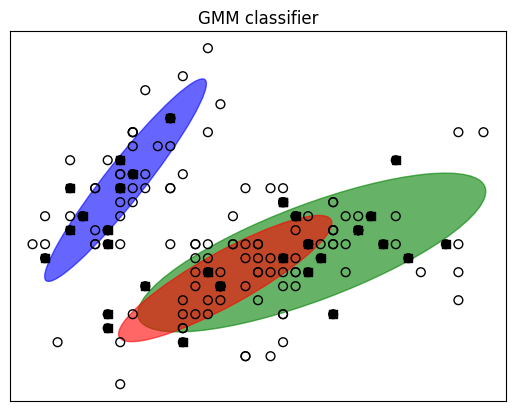

In [5]:
# Build GMM
classifier = GaussianMixture(n_components=num_classes, covariance_type='full', init_params='k-means++', max_iter=20)

# Initialize the GMM means 
classifier.means_ = np.array([X_train[y_train == i].mean(axis=0)for i in range(num_classes)])

# Train the GMM classifier 
classifier.fit(X_train)

# Draw boundaries
plt.figure()
colors = 'bgr'
for i, color in enumerate(colors):
    # Extract eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(classifier.covariances_[i][:2, :2])

    # Normalize the first eigenvector
    norm_vec = eigenvectors[0] / np.linalg.norm(eigenvectors[0])
    
    # Extract the angle of tilt
    angle = np.arctan2(norm_vec[1], norm_vec[0])
    angle = 180 * angle / np.pi 

    # Scaling factor to magnify the ellipses
    # (random value chosen to suit our needs)
    scaling_factor = 8
    eigenvalues *= scaling_factor 

    # Draw the ellipse
    ellipse = patches.Ellipse(classifier.means_[i, :2], eigenvalues[0], eigenvalues[1], 180 + angle, color=color)
    axis_handle = plt.subplot(1, 1, 1)
    ellipse.set_clip_box(axis_handle.bbox)
    ellipse.set_alpha(0.6)
    axis_handle.add_artist(ellipse)
    
# Plot the data 
colors = 'bgr'
for i, color in enumerate(colors):
    cur_data = iris.data[iris.target == i]
    plt.scatter(cur_data[:,0], cur_data[:,1], marker='o', facecolors='none', edgecolors='black', s=40, label=iris.target_names[i])

    test_data = X_test[y_test == i]
    plt.scatter(test_data[:,0], test_data[:,1], marker='s', facecolors='black', edgecolors='black', s=40, label=iris.target_names[i])

# Compute predictions for training and testing data
y_train_pred = classifier.predict(X_train)
accuracy_training = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print('Accuracy on training data =', accuracy_training)
         
y_test_pred = classifier.predict(X_test)
accuracy_testing = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
print('Accuracy on testing data =', accuracy_testing)

plt.title('GMM classifier')
plt.xticks(())
plt.yticks(())

plt.show()